In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
from tqdm.notebook import tqdm

In [10]:
def getVar(simn, var, iter):
    file = open(f'sims/sim{simn}/mesh_fc_{iter}.vtk')
    arr = []
    lines = file.readlines()
    j = 0
    while f'SCALARS {var} double 1\n' != lines[j]:
        j += 1
    j += 2
    while True:
        try:
            arr.append(float(lines[j]))
            j += 1
        except:
            break
    return np.array(arr)

def getVarHist(simn, var, iter=None):
    arrs = []
    if iter is None:
        iter = 500
    for i in range(1, iter+1):
        try:
            arrs.append(getVar(simn, var, i))
        except:
            continue
    return np.array(arrs)

def getMainAxis(arrs, n, m):
    i = np.arange(m-1)*n + int(n*7/8)
    i = i[:,None] + np.arange(-5, 5)[None,:]
    return np.max(arrs[...,i], axis=-1)

def getN(arrs):
    arrs[arrs == 0] = 1e18
    return np.cumsum(np.min(arrs, axis=-1))

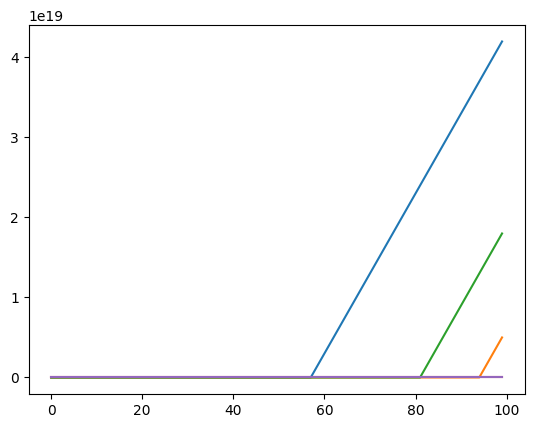

old 17
02 16
01 22
005 38
002 89


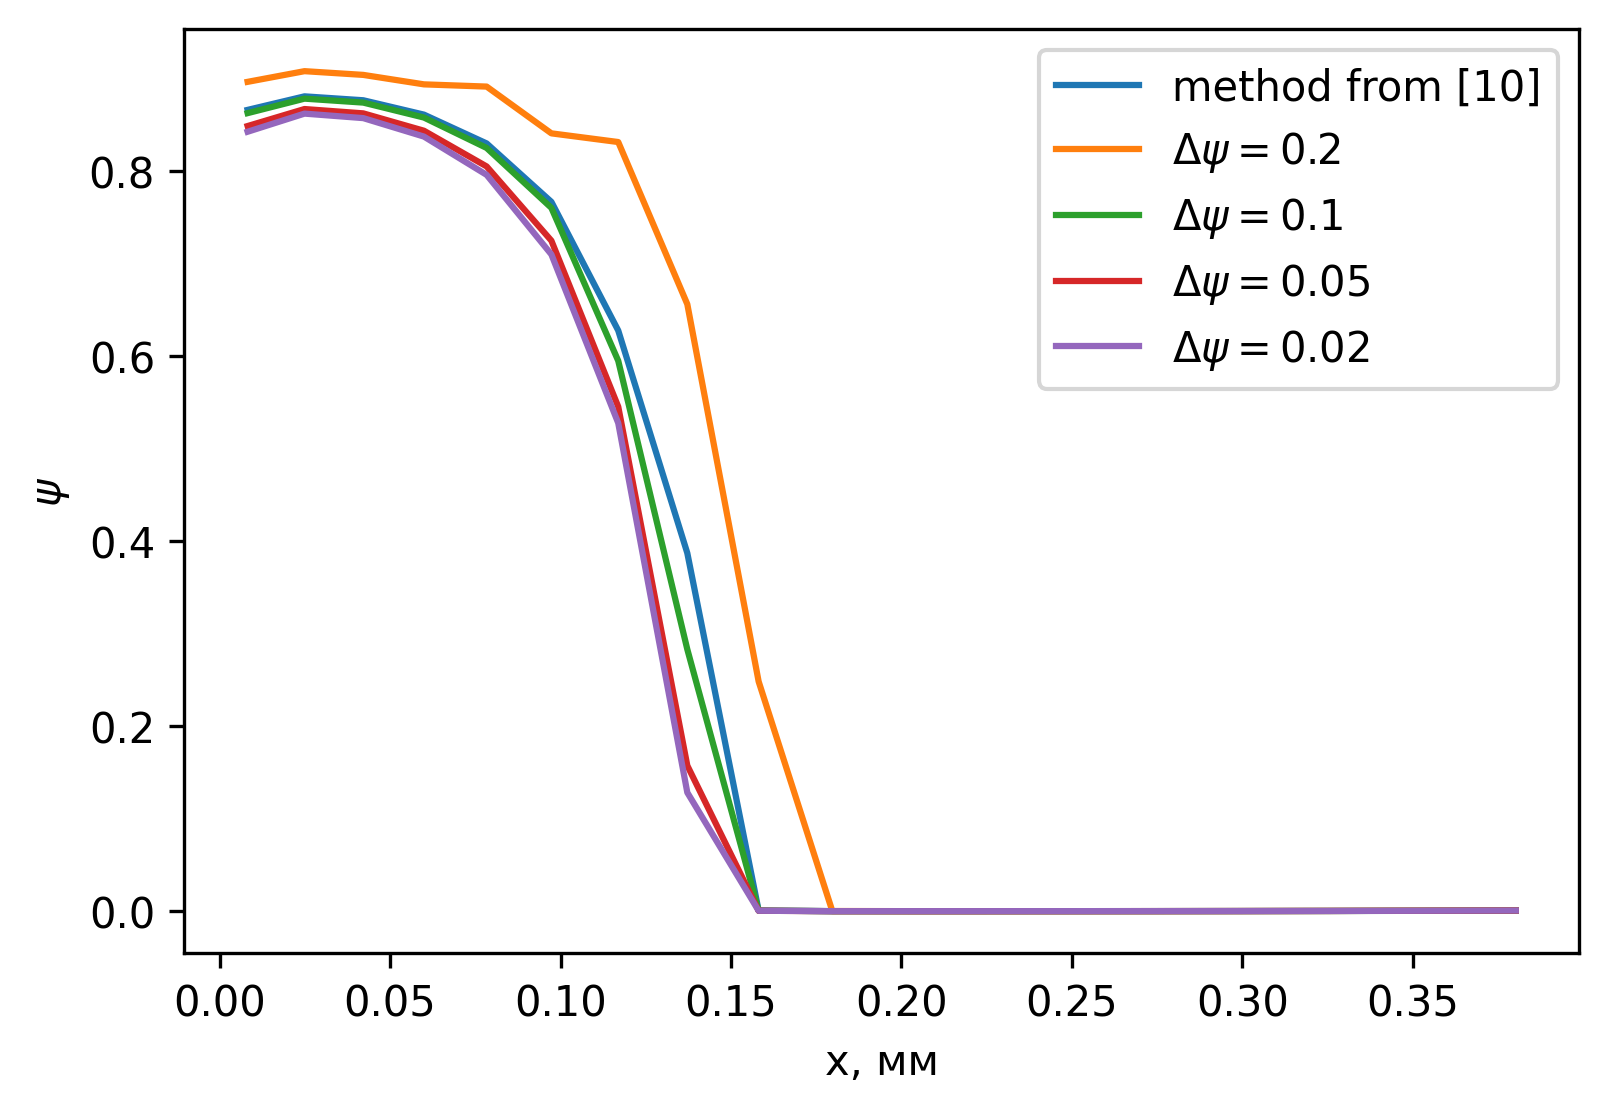

array([0.01586116, 0.04443907, 0.01107605, 0.00277393, 0.        ])

In [11]:
ks = []
ss = ['old', '02', '01', '005', '002']
for s in ss:
    ns = getN(getVarHist('dpsi'+s, 'deltaN', 100))
    plt.plot(ns)
    k = np.searchsorted(ns, 7e6)
    ks.append(k)
plt.show()

plt.figure(figsize=(6,4), dpi=300)
psis = []
for s, k in zip(ss, ks):
    print(s, k)
    psi = getMainAxis(getVar('dpsi'+s, 'psi', k), 200, 35)
    psis.append(psi)
    alpha = np.linspace(0, 1, 35)
    xs = (0.5**(1-alpha) * 1.5**alpha)
    xs = (xs[:-1] + xs[1:])/2 - 0.5
    lab = f'$\Delta \psi = 0.{s[1:]}$' if s != 'old' else 'method from [10]'
    plt.plot(xs[:18], psi[:18], label=lab)
plt.legend()
plt.xlabel('x, мм')
plt.ylabel('$\psi$')

# plt.title('Повреждения при разных методах расчета $\Delta N$')
plt.savefig('dpsi_comp.pdf')
plt.show()

psis = np.array(psis)
np.mean(np.abs(psis - psis[4]), axis=1)

In [13]:
ss = ['old', '02', '01', '005', '002']
psis = []
for s in ss:
    psi = getMainAxis(getVarHist('dpsi'+s, 'psi'), 200, 35)
    psis.append(psi)

old 16 0.647491138341244 5979818.0
02 11 0.647491138341244 4277720.0
01 22 0.647491138341244 6781975.0
005 41 0.647491138341244 7386844.0
002 97 0.647491138341244 7640542.999999999


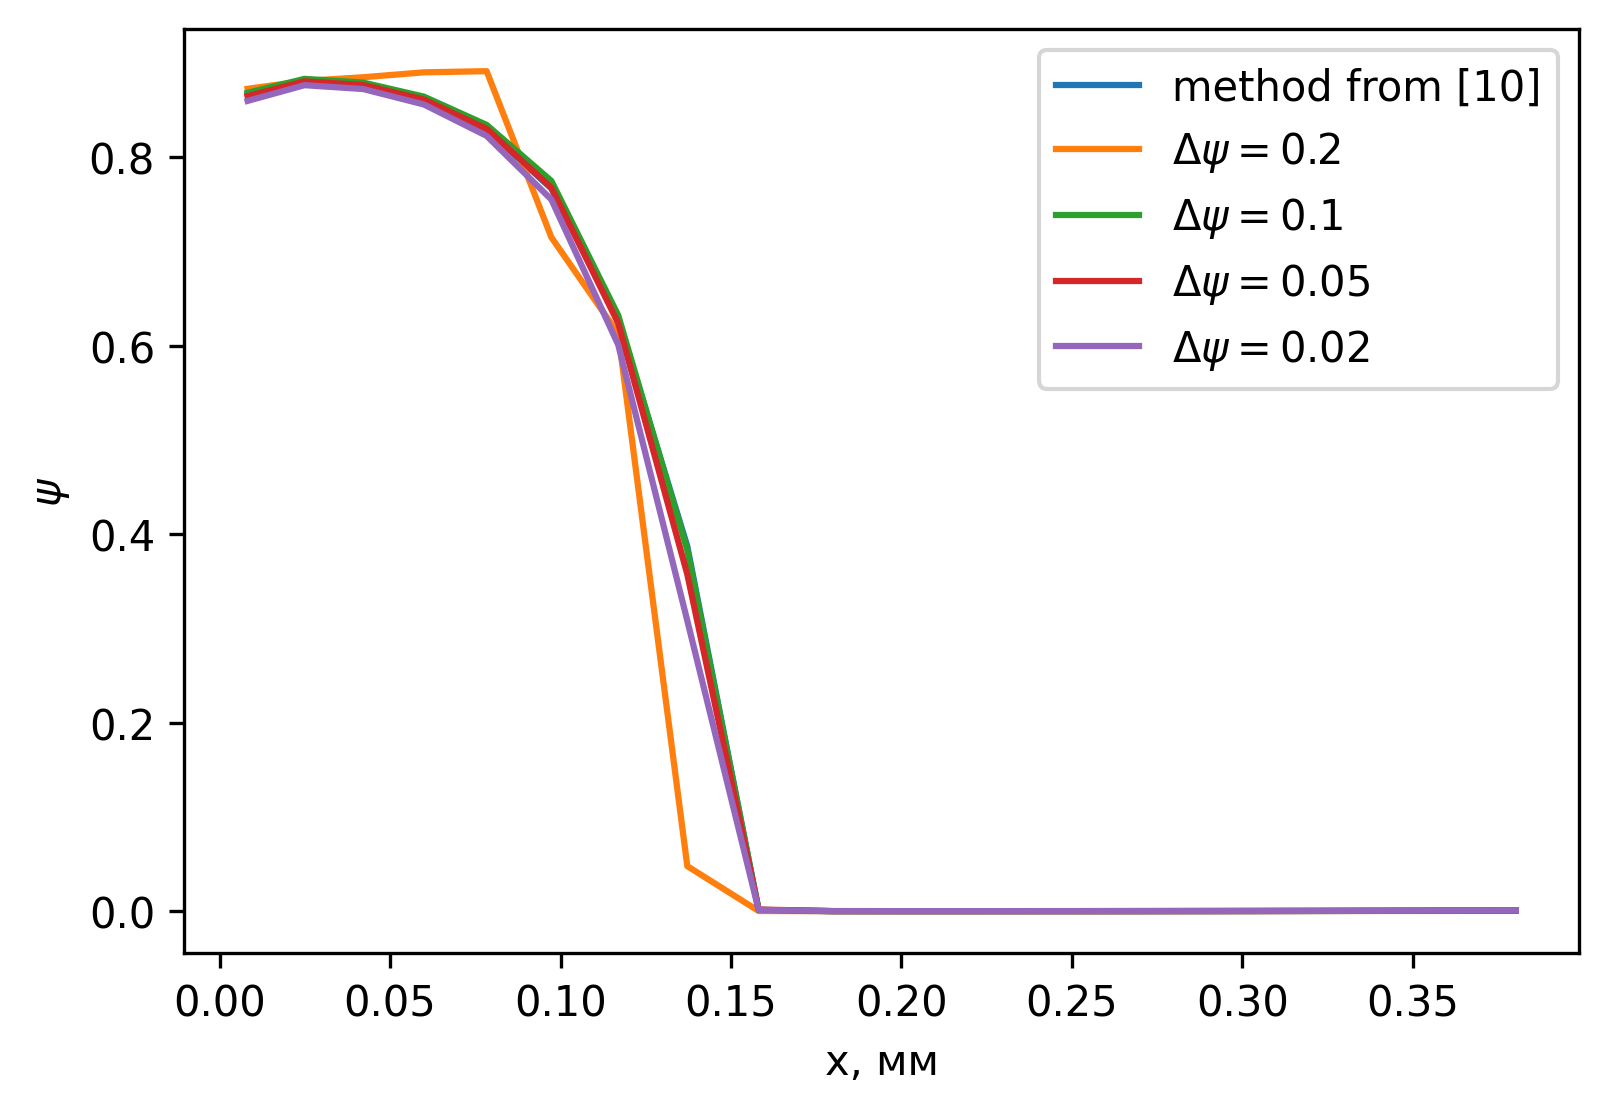

In [14]:
ss = ['old', '02', '01', '005', '002']
ks = []

plt.figure(figsize=(6,4), dpi=300)
for i, s in enumerate(ss):
    k = 0
    while np.searchsorted(np.sort(psis[i][k]), 0.6) > len(psis[i][k]) - 7:
        k += 1
    # if s == '002':
    #     k -= 1
    psis.append(psi)
    alpha = np.linspace(0, 1, 35)
    xs = (0.5**(1-alpha) * 1.5**alpha)
    print(s, k, xs[8], getN(getVarHist('dpsi'+s, 'deltaN', k))[-1])
    xs = (xs[:-1] + xs[1:])/2 - 0.5
    lab = f'$\Delta \psi = 0.{s[1:]}$' if s != 'old' else 'method from [10]'
    plt.plot(xs[:18], psis[i][k][:18], label=lab)
plt.legend()
plt.xlabel('x, мм')
plt.ylabel('$\psi$')

plt.savefig('fatigue_comp.pdf')
plt.show()

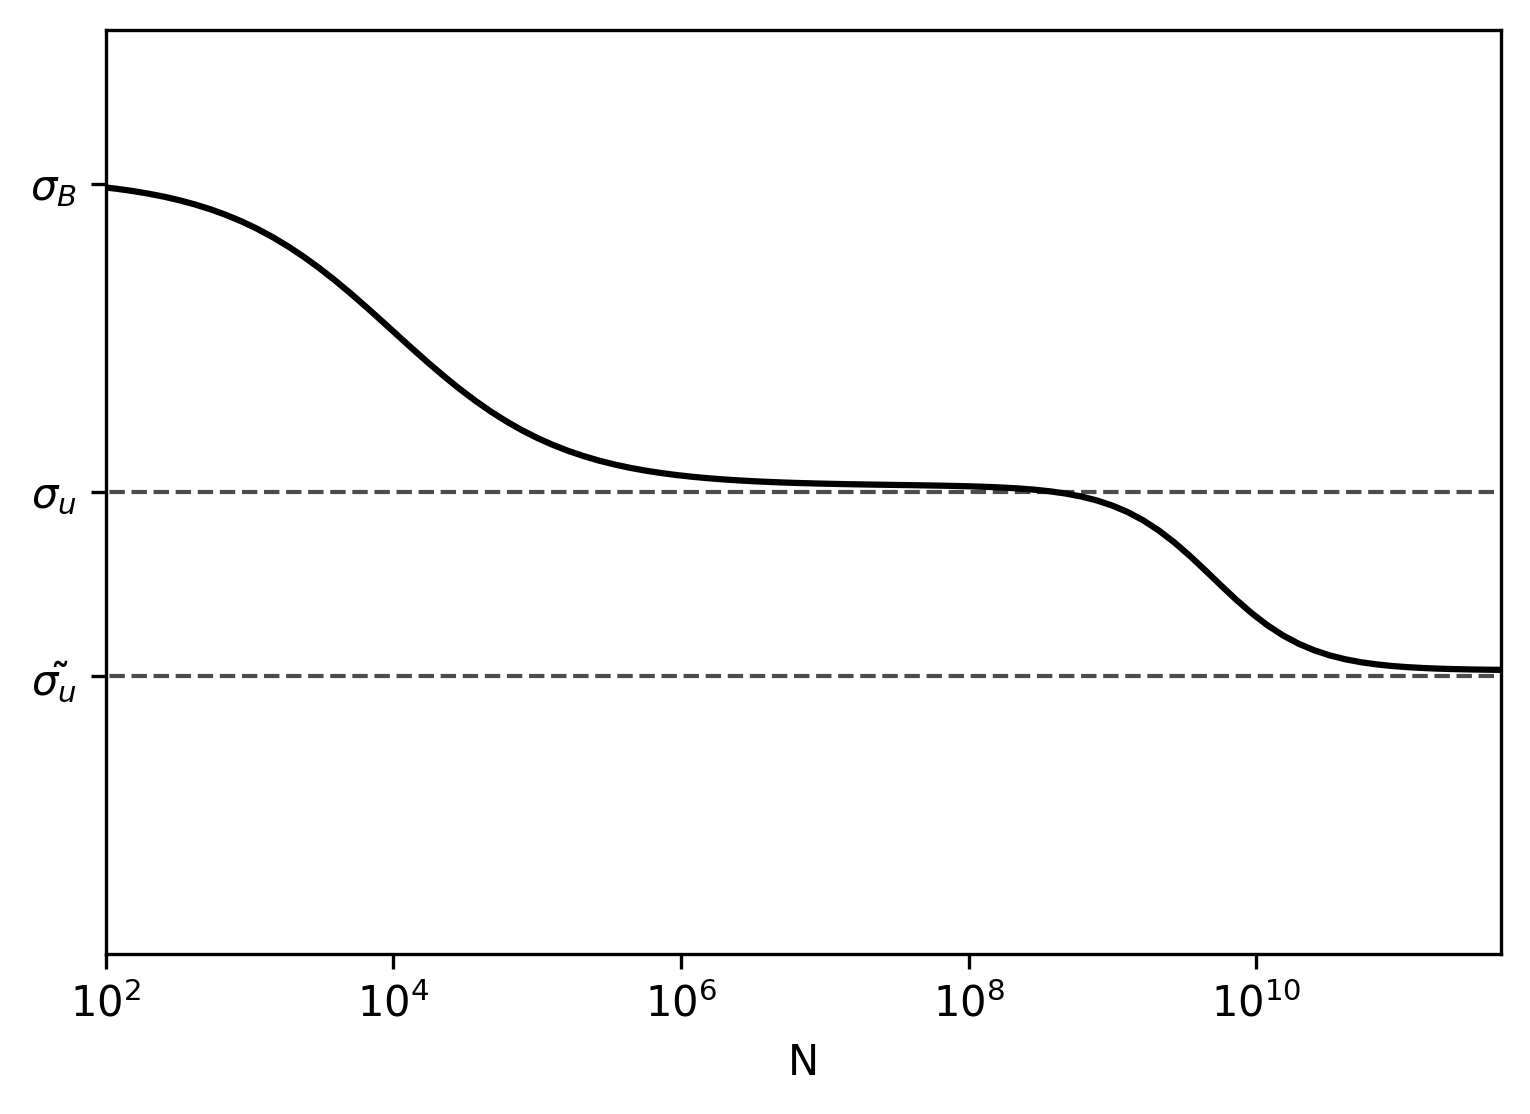

In [ ]:
x = np.linspace(1, 11.7, 100)

def sigmoid(x, a, b):
    return 1 / (np.exp((-x + a)*b) + 1)

y = 1.02 - sigmoid(x, 4.0, 1.7) - sigmoid(x, 9.7, 3)*.6

x = 10**x

plt.figure(figsize=(6,4), dpi=300)
plt.plot(x, y, 'k')
plt.plot([10, 10**11.7], [0, 0], '--k', linewidth=1, alpha=0.7)
plt.plot([10, 10**11.7], [-.6, -.6], '--k', linewidth=1, alpha=0.7)
plt.ylim(-1.5, 1.5)
plt.xlim(100, 10**11.7)
plt.xscale('log')
plt.xlabel('N')
plt.yticks([1, 0, -.6], ['$\sigma_B$', '$\sigma_u$', '$\\tilde{\sigma_u}$'])
plt.savefig('wohler.pdf')